In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv(r"C:\Users\vedan\Downloads\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [42]:
features = ["enginetype", "cylindernumber", "enginesize", "fuelsystem", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]
target = ['price']
cols = ['enginetype','cylindernumber', 'enginesize', 'fuelsystem']

In [43]:
for col in cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes
x=data[["enginetype", "cylindernumber", "enginesize", "fuelsystem", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]]
y = data[['price']]
for i in x:
    x=x.fillna(x.mean())
mean_values = data[target].mean()
std_values = data[target].std()
data[target] = (data[target] - mean_values) / std_values
'''null_rows = y.isnull()
x = x[~null_rows]
y = y[~null_rows]
'''
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()
x['intercept'] = 1
x

,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,intercept
0,-2.858109,-0.147115,0.125420,0.867444,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,1
1,-2.858109,-0.147115,0.125420,0.867444,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,1
2,1.882282,1.109494,1.046966,0.867444,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,1
3,-0.013874,-0.147115,-0.519662,0.867444,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,1
4,-0.013874,-1.403724,0.494038,0.867444,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.013874,-0.147115,0.678348,0.867444,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512,1
201,-0.013874,-0.147115,0.678348,0.867444,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151,1
202,1.882282,1.109494,1.507739,0.867444,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577,1
203,-0.013874,1.109494,0.770502,-0.125997,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725,1


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
def model(x,y,rate,iteration):
    m=y.size
    global theta
    theta=np.zeros((1,12))
    global cost_list
    cost_list=[]
    for i in range(iteration):
        y_pred=np.dot(theta,x.T).T
        cost=(1/(2*m))*np.sum(np.square(y_pred-y))
        d_theta=(1/m)*np.dot((y_pred-y).T,x)
        theta=theta-rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print(cost)
    return theta,cost_list[-1]

In [46]:
model(X_train,y_train,0.1,10000)

price    0.467244
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64


(array([[ 0.06330888, -0.11365696,  0.38643916, -0.06259239, -0.04575464,
         -0.09790172,  0.24215938,  0.38149106,  0.0627014 , -0.15442305,
         -0.1580606 , -0.00985864]]),
 price    0.096671
 dtype: float64)

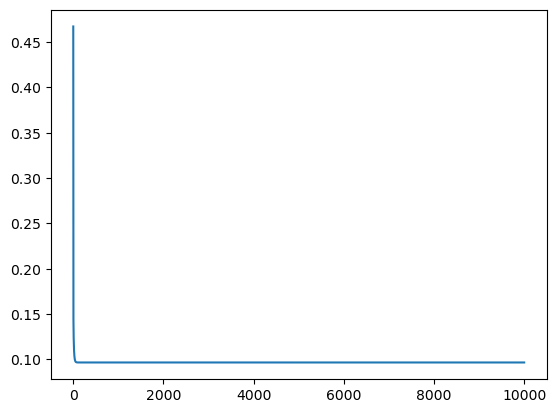

In [47]:
rng=np.arange(0,10000)
plt.plot(rng,cost_list)
plt.show()

In [52]:
theta, _ = model(X_train, y_train, 0.1, 10000)  # Using your model function

y_pred = np.dot(X_test, theta.T)  # Assuming model outputs a single value

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
# Calculate accuracy (adjust for multi-class or multi-label settings if needed)
accuracy = float(r2score(y_pred,y_test))

print("Accuracy on test set:", accuracy*100,"%")

price    0.467244
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
price    0.096671
dtype: float64
Accuracy on test set: 73.43052654414042 %


C:\Users\vedan\AppData\Local\Temp\ipykernel_17404\2909191212.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  accuracy = float(r2score(y_pred,y_test))
